# Analysis of the First Retrieval of Google Maps Reviews

In [1]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
import pandas as pd
import numpy as np
import json

## Loading in the data

In [2]:
# Connecting to mongodb
uri = 'mongodb://localhost:27017'
client = MongoClient(uri)
client.list_database_names()

['admin', 'config', 'local', 'reviews']

In [3]:
# connecting to my reviews database
db = client['reviews']
col = db['google_reviews']
num_docs = col.count_documents({})
print(f"{num_docs} Total documents in 'google_reviews' collection")

11898 Total documents in 'google_reviews' collection


In [4]:
# Seeing what a record looks like
pprint(col.find_one())

{'_id': ObjectId('69648f8bfda275b121905773'),
 'author': 'Don Larson',
 'author_profile_url': 'https://www.google.com/maps/contrib/111946761245167461169/reviews?hl=en',
 'city': 'Provo',
 'company': 'Thaitours',
 'complex': 'Alpine Village',
 'created_date': datetime.datetime(2026, 1, 12, 5, 52, 1, 653000),
 'description': {'en': '🚨DO NOT BELIEVE THE PRICING THEY HAVE ON THEIR '
                       'WEBSITE. I signed up expecting to pay $650 for rent. '
                       'They have a ton of fees they do not disclose when you '
                       'are there in person. My rent after all their fees is '
                       '$830/month.\n'
                       '\n'
                       '🚨This is the actual pricing break down\n'
                       '$650 Rent\n'
                       '$60 Parking Pass\n'
                       '$67 Utility Charge\n'
                       '$21 Communications Fee(Internet)\n'
                       '$13 Renters Liability Insurance\n'
 

In [5]:
## Reading into a pandas dataframe
df = pd.DataFrame(list(col.find()))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11898 entries, 0 to 11897
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   _id                 11898 non-null  object        
 1   review_id           11898 non-null  object        
 2   author              11898 non-null  object        
 3   author_profile_url  11898 non-null  object        
 4   city                11898 non-null  object        
 5   company             11898 non-null  object        
 6   complex             11898 non-null  object        
 7   created_date        11898 non-null  datetime64[ns]
 8   description         11898 non-null  object        
 9   last_modified_date  11898 non-null  datetime64[ns]
 10  likes               11898 non-null  int64         
 11  owner_responses     11898 non-null  object        
 12  profile_picture     11898 non-null  object        
 13  rating              11898 non-null  float64   

In [7]:
df.complex.value_counts()

complex
Wolverine Crossing             1765
The Green                      1320
Raintree                        782
The Branbury                    749
Glenwood Apartments             716
Liberty Square                  708
Axis Luxury Living              695
Alpine Village                  675
Crestwood Apartments            451
Village at South Campus         426
Promenade Place                 419
Summerwood                      344
University Towers               311
University Gateway              304
Village on the Parkway          282
Cinnamon Tree                   227
Carriage Cove                   221
Stadium 150                     183
Monticello                      182
Sparks II                       140
200 City View Apartments        132
Ventana Student Housing         126
Omni Apartments                 105
Brittany                         97
Park Place Apartments            79
Belmont Condos                   74
Blueridge                        74
Alta Apartments     

<Axes: xlabel='rating', ylabel='Count'>

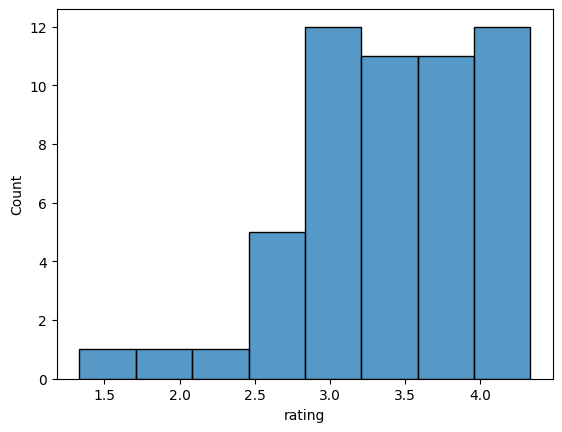

In [8]:
sns.histplot(df.groupby('complex')['rating'].mean())

<Axes: xlabel='rating', ylabel='count'>

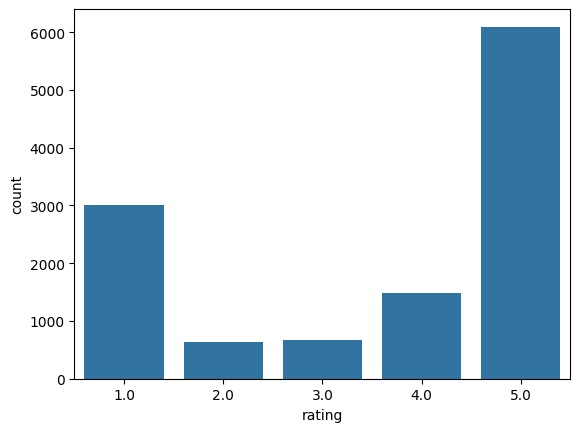

In [9]:
sns.barplot(df.rating.value_counts())

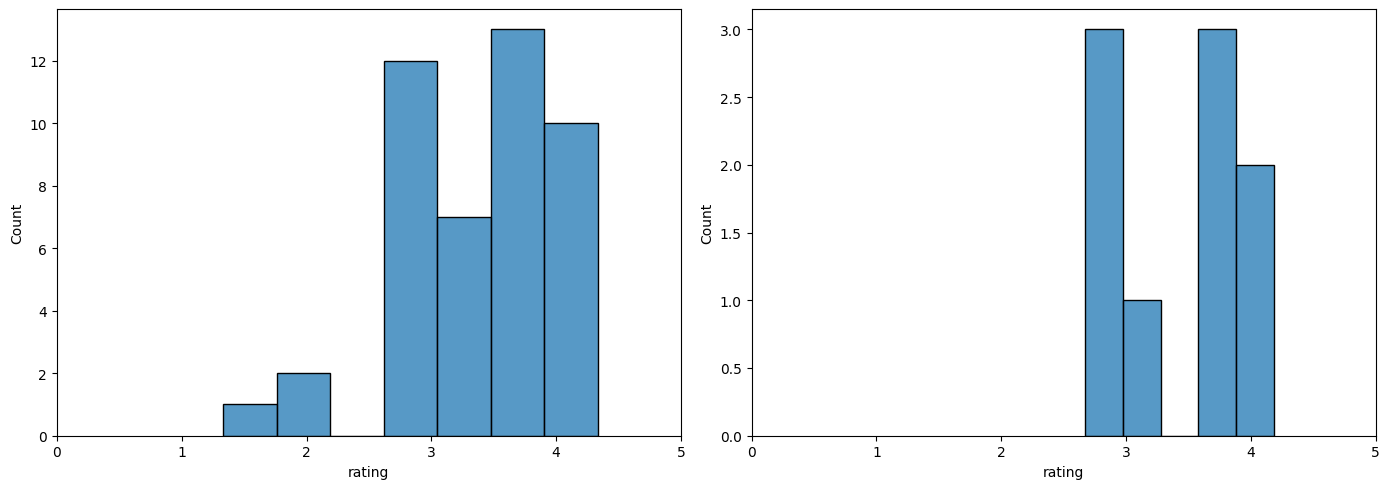

In [20]:
provo = df[df['city'] == 'Provo']
orem = df[df['city'] == 'Orem']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.histplot(provo.groupby('complex')['rating'].mean(), ax = ax[0])
ax[0].set_xlim(0, 5)
sns.histplot(orem.groupby('complex')['rating'].mean(), ax=ax[1])
ax[1].set_xlim(0, 5)

plt.tight_layout()

In [ ]:
provo['rating'].value_counts()


rating
5.0    2695
1.0    1767
4.0    1022
3.0     446
2.0     402
Name: count, dtype: int64

In [28]:
df.groupby('city')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Orem,5566.0,3.81405,1.673349,1.0,2.0,5.0,5.0,5.0
Provo,6332.0,3.39103,1.700335,1.0,1.0,4.0,5.0,5.0


<Axes: xlabel='rating', ylabel='count'>

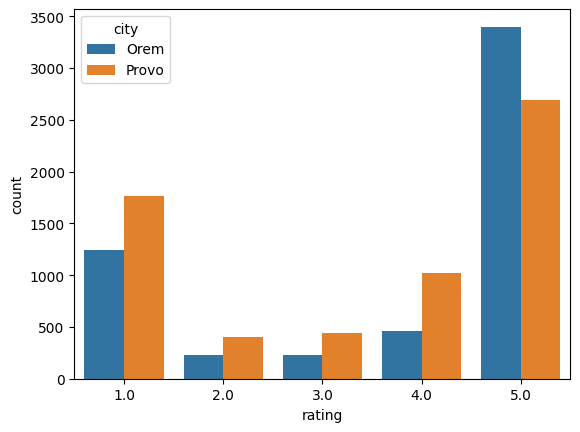

In [52]:
sns.barplot(data=df.groupby('city')['rating'].value_counts().reset_index(), x='rating', y='count', hue='city')

In [47]:
df.groupby('city')['rating'].value_counts().reset_index()

,city,rating,count
0,Orem,5.0,3399
1,Orem,1.0,1247
2,Orem,4.0,457
3,Orem,3.0,233
4,Orem,2.0,230
5,Provo,5.0,2695
6,Provo,1.0,1767
7,Provo,4.0,1022
8,Provo,3.0,446
9,Provo,2.0,402


In [59]:
# 1. Get the value counts for the 'complex' column
counts = df['complex'].value_counts() # Returns a Series of counts

# 2. Identify values that appear more than 500 times
# This returns a boolean Series (True/False for each unique value)
frequent_values_mask = counts > 200

# 3. Get the index of these frequent values (the actual values from the column)
frequent_values = counts[frequent_values_mask].index

# 4. Filter the original DataFrame using the `isin()` method
high_count_df = df[df['complex'].isin(frequent_values)]

In [60]:
high_count_df.complex.value_counts()

complex
Wolverine Crossing         1765
The Green                  1320
Raintree                    782
The Branbury                749
Glenwood Apartments         716
Liberty Square              708
Axis Luxury Living          695
Alpine Village              675
Crestwood Apartments        451
Village at South Campus     426
Promenade Place             419
Summerwood                  344
University Towers           311
University Gateway          304
Village on the Parkway      282
Cinnamon Tree               227
Carriage Cove               221
Name: count, dtype: int64

In [61]:
high_count_df.groupby('city')['likes'].count()

city
Orem     5440
Provo    4955
Name: likes, dtype: int64

In [63]:
len(high_count_df.complex.value_counts())

17